In [1]:
import sys
import os
sys.path.append("/shared/home/wcarvalh/projects/sfgen/") # 
print("Started")

Started


In [2]:
from IPython.display import display, HTML

from sfgen.tools.tensorboard_data import TensorboardData
from sfgen.tools.tensorboard_vistool import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
run_data = TensorboardData(
    search_paths=[],
    search_kwargs=dict(
        basepath="/shared/home/wcarvalh/projects/sfgen/_rlpyt/data/local/",
#         split=['date','time', 'experiment', 'variant'],
        njobs=1,
        verbose=1,
    )
)
run_data.load_paths(
    search_paths=[
        "20210118/*/*/*",
    ]
)
run_data.load_settings()


get_runs: /shared/home/wcarvalh/projects/sfgen/_rlpyt/data/local/20210118/*/*/*
loaded: 100%|██████████| 8/8 [00:00<00:00, 52022.38it/s]

/shared/home/wcarvalh/projects/sfgen/_rlpyt/data/local/20210118/*/*/*: 8


In [4]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'cumsteps' in k.lower() or 'average' in k.lower(),
#     load_paths=True
)

settings: 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]


In [5]:
nonzero_key = run_data.keys_like('nonzeroreward')[0]
return_key = run_data.keys_like('return')[0]
length_key = run_data.keys_like('length')[0]
steps_key = run_data.keys_like('cumsteps')[0]
print(nonzero_key, return_key, length_key, steps_key)

NonzeroRewards/Average Return/Average Length/Average Diagnostics/CumSteps


In [6]:
panel_tool = PanelTool(
    title_with_legend="GoToSeq",
    filter_column='mean',
    dims_to_plot=dict(
        env=dict(
            level=[
                "GoTo",
                "Pickup",
                "UnblockPickup",
                "Open",
                "Unlock",
                "PutNext",
                "Synth",
                "GoToSeq",
            ]
        )
    ),
    dim_titles=[
        "GoTo",
        "Pickup",
        "UnblockPickup",
        "Open",
        "Unlock",
        "PutNext",
        "Synth",
        "GoToSeq",
    ],
    plot_settings=[
            dict(
                key=nonzero_key,
                title="Average Success Rate",
                ylabel='Success Rate',
                xlabel='Frames',
                ylim=[0,1],
            ),
#             dict(
#                 key=length_key,
#                 title="Average Length",
#                 xlabel='Frames',
#             )
    ],
  
    
    
    
    
    filter_key=return_key,
    plot_data_kwargs=dict(xlabel_key=steps_key),
    tensorboard_data=run_data,
)


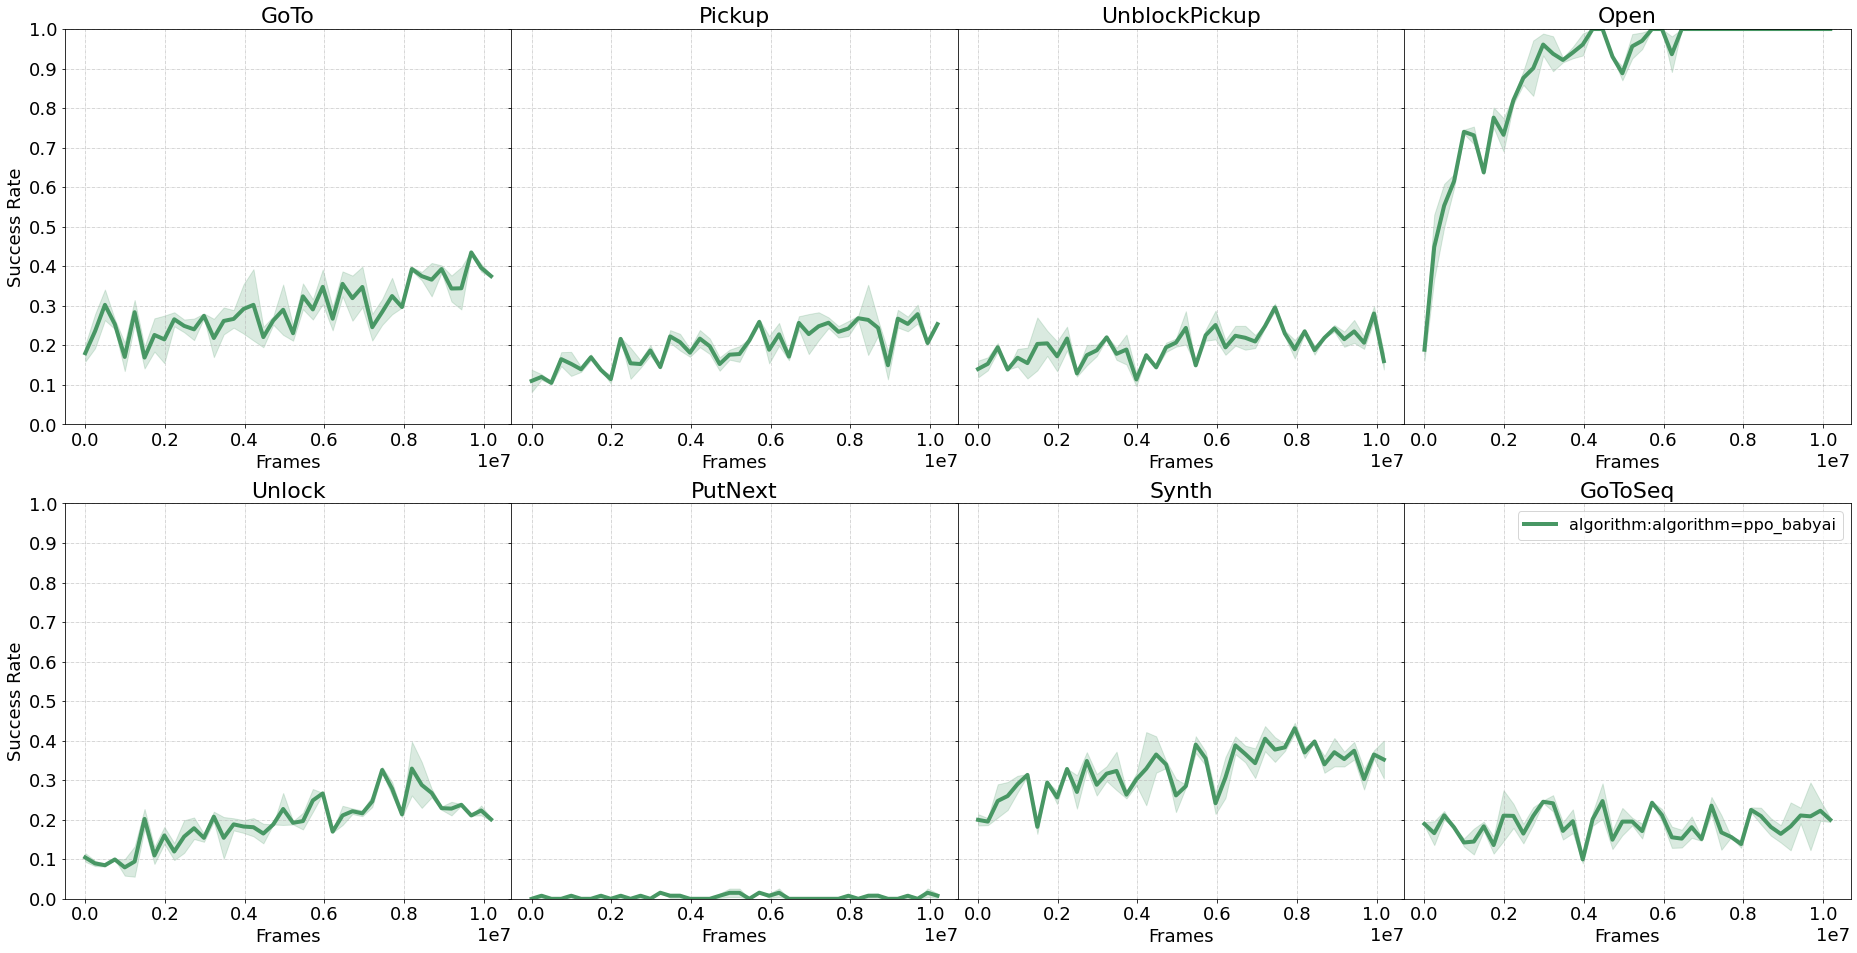

In [7]:
# display(HTML(f"<h1>What's the overall progress?</h1>"))        
panel_tool.plot_filters_across_dimensions(
    maxcols=4,
    legend_kwargs='none',
    data_filter_space={
        'algorithm' : {'algorithm' : ['ppo_babyai']},
    }
)